<a href="https://colab.research.google.com/github/VCosmo/POLOSA/blob/main/Copia_di_untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as spi
from matplotlib import cm

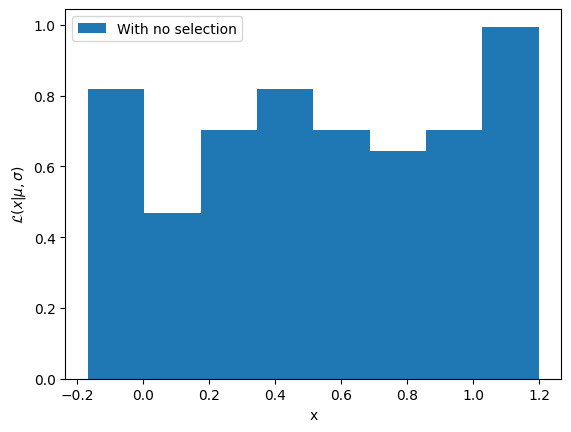

In [36]:
N = 100
samples = np.random.uniform(-0.2, 1.2, N)
_=plt.hist(samples,bins='auto',density='True',label='With no selection') 

plt.xlabel('x')
plt.ylabel(r'$\mathcal{L}(x|\mu,\sigma)$')
plt.legend()

In [ ]:
#x = np.linspace(-2, 2, 1000)
#print(samples)
#probe = uniform_likelihood ( samples, 0.2, 0.6)

#plt.plot(samples , probe)
#plt.hist(samples,bins='auto',density='True',label='With no selection') 


In [37]:
def uniform_likelihood(a, b, x):
    if np.all(x >= a) and np.all(x <= b):
        return - np.log(b - a)*len(x)
    else:
        return -np.inf

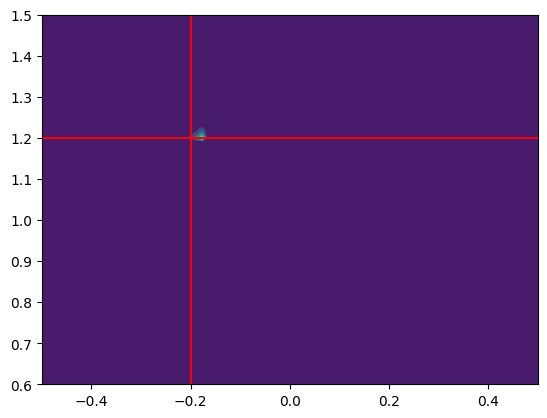

In [38]:

dim = 100
amin, amax = -0.5, 0.5
bmin, bmax = 0.6, 1.5

b_array = np.linspace(bmin, bmax, dim)
a_array = np.linspace(amin, amax, dim)

b_posterior = np.zeros((dim, dim))
  # Define the list of samples here

for i in range(len(b_array)):
    for j in range(len(a_array)):
       b_posterior[i][j] = uniform_likelihood(a_array[i], b_array[j], samples)  #IL MAX DI PROBABILITA' VIENE SBAGLIATOOOO

b_posterior = np.exp(b_posterior)
#f = lambda x, y: b_posterior[int(x)][int(y)]
#norm = spi.dblquad(f, bmin, bmax, lambda x: amin, lambda x: amax)   
#b_posterior /= norm[0]

#plt.plot(b_array, b_posterior[0], label='Experiment n°{:d}'.format(0), alpha=1)
#plt.legend()
#plt.xlabel('$\mu$')
#plt.ylabel('PDF p($\mu$|{x})')

X, Y = np.meshgrid(a_array, b_array, indexing= 'ij')
#fig = plt.figure(figsize=(12, 8))

#ax = fig.add_subplot(111, projection='3d')

plt.contourf(X, Y, b_posterior,)
plt.axhline(1.2, color='r')
plt.axvline(-0.2, color='r')
#ax.set_xlabel('a')
#ax.set_ylabel('b')
plt.show()

In [39]:
def selection(a, b, min_thr, max_thr):
    integr = np.linspace(a,b,100)
    ppop = np.ones_like(integr)/(b-a)
    ppop[(integr<= min_thr) | (integr>= max_thr)] = 0.
    return np.trapz(ppop,integr)

[[1.         1.         1.         ... 0.75252525 0.75252525 0.75252525]
 [1.         1.         1.         ... 0.75252525 0.75252525 0.75252525]
 [1.         1.         1.         ... 0.75252525 0.75252525 0.74242424]
 ...
 [1.         1.         1.         ... 0.52020202 0.51010101 0.51010101]
 [1.         1.         1.         ... 0.51010101 0.51010101 0.5       ]
 [1.         1.         1.         ... 0.51010101 0.5        0.5       ]]


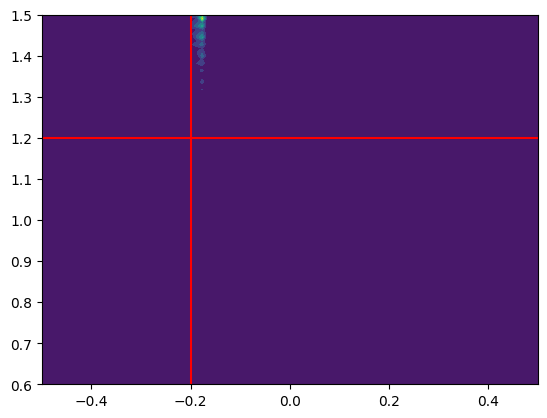

In [42]:
M = 1
m = -1
samples_filtered = samples[(samples < M) & (samples > m)]
#print(samples_filtered)

b_array = np.linspace(bmin, bmax, dim)         #tables
a_array = np.linspace(amin, amax, dim)

b_posterior = np.zeros((dim, dim))  
I = np.ones((dim,dim))

for i in range(len(b_array)):
    for j in range(len(a_array)):
       I[i][j] = selection(a_array[i], b_array[j], m, M)
print(I)
for i in range(len(b_array)):
    for j in range(len(a_array)):
        b_posterior[i][j] = uniform_likelihood(a_array[i], b_array[j], samples_filtered) - len(samples)*np.log(I[i][j])

b_posterior = np.exp(b_posterior) 
X, Y = np.meshgrid(a_array, b_array, indexing= 'ij')

plt.contourf(X, Y, b_posterior,)
plt.axhline(1.2, color='r')
plt.axvline(-0.2, color='r')

In [ ]:
def selection(x , a, b):
  if b>0.9:
    norm=(0.9-a)/(b-a)
  else:
    norm=1.
  pdf = uniform_likelihood (x , a, b ) / norm
  return pdf 


In [12]:
samples_filtered = samples[samples < 0.9 ]

b_array = np.linspace(0.6,2, 1000)

b_posterior = np.zeros_like(b_array)

for i in range(len(b_array)):
  b_posterior[i] = np.prod( selection( samples_filtered, 0, b_array[i]))

b_posterior /= np.trapz(b_posterior, b_array)
plt.plot(b_array , b_posterior)

plt.contourf(X, Y, b_posterior,)
plt.axhline(1.2, color='r')
plt.axvline(-0.2, color='r')

TypeError: ignored

In [ ]:
N = 1000
REP = 10

mu_array=np.linspace(0.5,2,N)#defines a standard table 

mu_prior = np.ones_like(mu_array) #defines p(mu) table 

mu_posterior=np.zeros_like(mu_array) #creates p(mu|{x}) table 

mu_posterior_total=np.ones_like(mu_array)

for j in range(REP):
    
    samples = np.random.uniform(0, 1, N)
    entries = 0

    for i in range(len(mu_array)):
       if samples[i] < 0.7 :
       entries = i

    for i in range(len(mu_array)):
      mu_posterior[i] = np.exp(-0.5*( (N/entries - mu_array[i]/0.7 ) /np.std(mu_array / 0.7) )**2)
      mu_posterior[i] = ( 2 * 3.14 * np.std(mu_array / 0.7) )**(-1) *(mu_posterior[i])*mu_prior[i]
      plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(0),alpha=1) 
      
mu_posterior_total*=mu_posterior

plt.plot(mu_array,mu_posterior_total,label='Experiment n°{:d}'.format(0),alpha=1) 
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})') 



IndentationError: ignored

63
0.6248067109896563


Text(0, 0.5, 'PDF p($\\mu$|{x})')

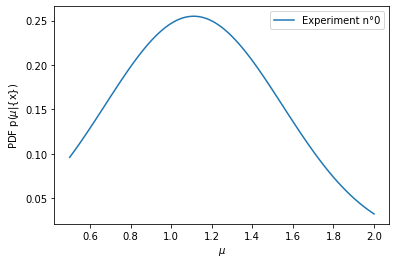

In [ ]:
mu_array=np.linspace(0.5,2,N)#defines a standard table 

mu_prior = np.ones_like(mu_array) #defines p(mu) table 

mu_posterior=np.zeros_like(mu_array) #creates p(mu|{x}) table 

#print(mu_array)

entries = 0

for i in range(len(mu_array)):
    if samples[i] < 0.7 :
       entries = entries + 1

print(entries)


for i in range(len(mu_array)):
     mu_posterior[i] = np.exp(-0.5*( (N/entries - mu_array[i]/0.7 ) /np.std(mu_array / 0.7) )**2)
     mu_posterior[i] = ( 2 * 3.14 * np.std(mu_array / 0.7) )**(-1) *(mu_posterior[i])*mu_prior[i]

print(np.std(mu_array / 0.7))


#print(mu_posterior, entries)

plt.plot(mu_array,mu_posterior,label='Experiment n°{:d}'.format(0),alpha=1) 
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})') 